# ENTREGA INVESTIGACIÓ OPERATIVA

## Carreguem el dataset i el preparem per fer l'exploració de dades

In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
#!pip install seaborn
import seaborn as sns

In [2]:
df=pd.read_csv("cardio_data_processed.csv")

In [3]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1


In [4]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


Eliminem les altures que no tenen sentit

In [5]:
df=df[df['height']>140]

In [6]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1
68201,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2
68202,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2
68203,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1


In [7]:
df[df['bmi']>60]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
381,552,16718,2,165,169.0,120,80,1,1,0,0,1,0,45,62.075298,Hypertension Stage 1,Hypertension Stage 1
2398,3470,23646,2,159,165.0,130,70,1,1,0,0,0,0,64,65.266406,Hypertension Stage 1,Hypertension Stage 1
3330,4825,14585,1,159,159.0,100,80,1,1,0,0,1,0,39,62.893082,Hypertension Stage 1,Hypertension Stage 1
14311,20970,21135,1,159,153.0,120,80,1,1,0,0,1,1,57,60.519758,Hypertension Stage 1,Hypertension Stage 1
18468,27063,15421,1,155,163.0,180,100,1,1,0,0,1,1,42,67.845994,Hypertension Stage 2,Hypertension Stage 2
19074,27962,23193,1,162,162.0,150,90,1,1,0,0,1,1,63,61.728395,Hypertension Stage 2,Hypertension Stage 2
19572,28683,20656,2,165,178.0,120,80,1,1,1,1,1,0,56,65.381084,Hypertension Stage 1,Hypertension Stage 1
39669,58175,21728,1,154,162.0,120,80,1,1,0,0,1,0,59,68.308315,Hypertension Stage 1,Hypertension Stage 1
40775,59768,20464,1,164,164.0,140,90,3,3,0,0,1,1,56,60.975610,Hypertension Stage 2,Hypertension Stage 2
41357,60631,19450,1,160,155.0,120,80,1,1,0,0,1,1,53,60.546875,Hypertension Stage 1,Hypertension Stage 1


sns.boxplot(x=df['bmi'])
plt.xlabel("Bmi")
plt.savefig("boxplot_BMI.png",dpi=300,bbox_inches="tight")
plt.show()

In [8]:
df=pd.get_dummies(df, columns=['gender'])

In [9]:
df

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded,gender_1,gender_2
0,0,18393,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1,False,True
1,1,20228,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2,True,False
2,2,18857,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1,True,False
3,3,17623,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2,False,True
4,4,17474,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1,False,True
68201,99995,22601,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2,True,False
68202,99996,19066,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2,False,True
68203,99998,22431,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1,True,False


In [10]:
df.rename(columns={'gender_1': 'Female', 'gender_2': 'Male'}, inplace=True)

In [11]:
df

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded,Female,Male
0,0,18393,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1,False,True
1,1,20228,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2,True,False
2,2,18857,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1,True,False
3,3,17623,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2,False,True
4,4,17474,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1,False,True
68201,99995,22601,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2,True,False
68202,99996,19066,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2,False,True
68203,99998,22431,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1,True,False


In [12]:
df['Female'] = df['Female'].astype(int)

In [13]:
df['Male'] = df['Male'].astype(int)

In [14]:
df

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded,Female,Male
0,0,18393,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1,0,1
1,1,20228,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2,1,0
2,2,18857,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1,1,0
3,3,17623,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2,0,1
4,4,17474,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,99993,19240,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,Hypertension Stage 1,Hypertension Stage 1,0,1
68201,99995,22601,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,Hypertension Stage 2,Hypertension Stage 2,1,0
68202,99996,19066,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,Hypertension Stage 2,Hypertension Stage 2,0,1
68203,99998,22431,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,Hypertension Stage 1,Hypertension Stage 1,1,0


In [15]:
df = df.drop('id', axis=1)

In [16]:
df = df.drop('bp_category', axis=1)

In [17]:
df=df.drop('bp_category_encoded',axis=1)

In [18]:
df=df.drop('height',axis=1)

In [19]:
df=df.drop('weight',axis=1)

In [20]:
df['age']=df['age_years']

In [21]:
df=df.drop('age_years',axis=1)

In [22]:
df.to_csv('cardio_data_nou.csv', index=False)

## Exploració de les dades

#### Mitjana i desviació estàndard

In [23]:
df.describe()

,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,Female,Male
count,68011.000000,68011.000000,68011.000000,68011.000000,68011.000000,68011.000000,68011.000000,68011.000000,68011.000000,68011.000000,68011.000000,68011.000000
mean,52.824117,126.434650,81.266192,1.363529,1.225287,0.087780,0.053197,0.803635,0.493700,27.418330,0.651159,0.348841
std,6.767902,15.956868,9.141924,0.678358,0.571439,0.282977,0.224428,0.397251,0.499964,5.170303,0.476607,0.476607
min,29.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.471784,0.000000,0.000000
25%,48.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115,0.000000,0.000000
50%,53.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,26.298488,1.000000,0.000000
75%,58.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,30.116002,1.000000,1.000000
max,64.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,68.308315,1.000000,1.000000


#### Distribució i valors atípics

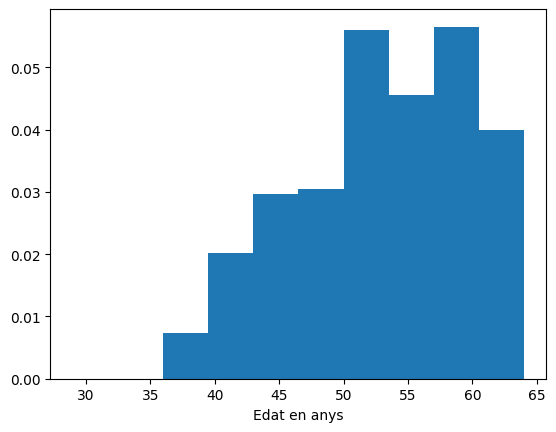

In [24]:
plt.hist(df['age'],density=True)
plt.xlabel("Edat en anys")
plt.savefig("histograma_age.png",dpi=300,bbox_inches="tight")
plt.show()

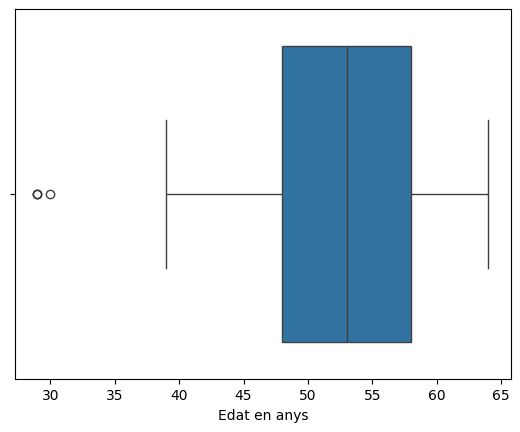

In [25]:
sns.boxplot(x=df['age'])
plt.xlabel("Edat en anys")
plt.savefig("boxplot_age.png",dpi=300,bbox_inches="tight")
plt.show()

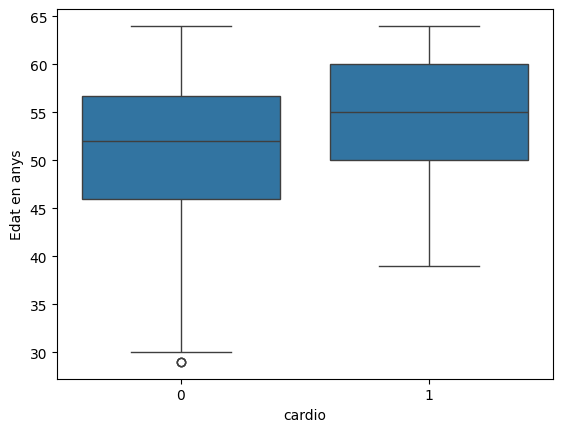

In [26]:
sns.boxplot(y=df['age'],x=df['cardio'])
plt.ylabel("Edat en anys")
plt.savefig("boxplot_age_cardio.png",dpi=300,bbox_inches="tight")
plt.show()

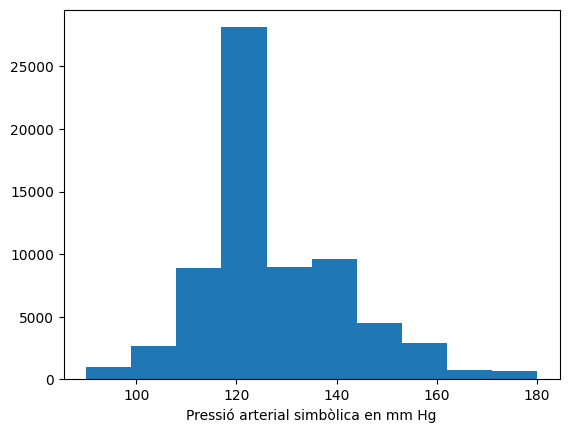

In [27]:
plt.hist(df['ap_hi'])
plt.xlabel("Pressió arterial simbòlica en mm Hg")
plt.savefig("histograma_aphi.png",dpi=300,bbox_inches="tight")
plt.show()

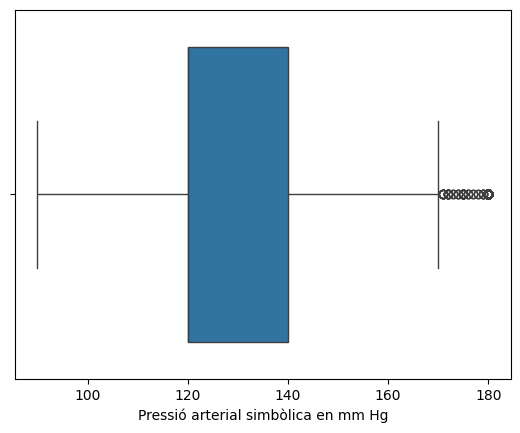

In [28]:
sns.boxplot(x=df['ap_hi'])
plt.xlabel("Pressió arterial simbòlica en mm Hg")
plt.savefig("boxplot_aphi.png",dpi=300,bbox_inches="tight")
plt.show()

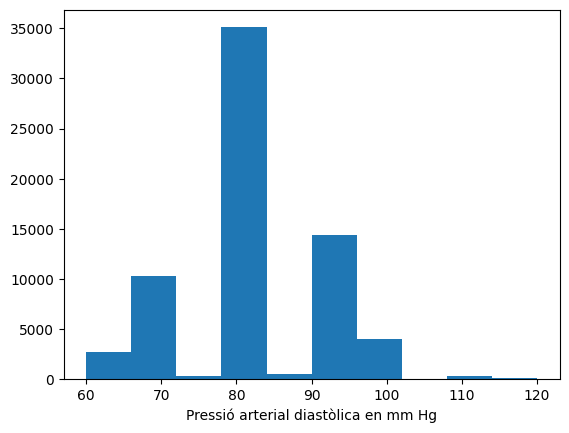

In [29]:
plt.hist(df['ap_lo'])
plt.xlabel("Pressió arterial diastòlica en mm Hg")
plt.savefig("histograma_aplo.png",dpi=300,bbox_inches="tight")
plt.show()

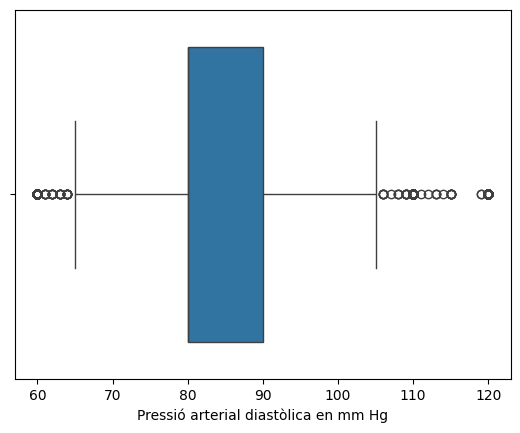

In [30]:
sns.boxplot(x=df['ap_lo'])
plt.xlabel("Pressió arterial diastòlica en mm Hg")
plt.savefig("boxplot_aplo.png",dpi=300,bbox_inches="tight")
plt.show()

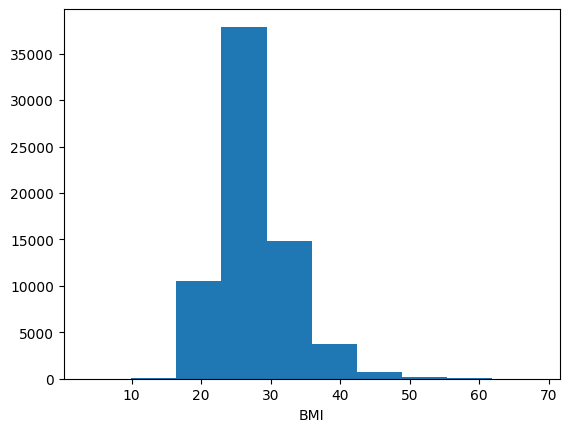

In [31]:
plt.hist(df['bmi'])
plt.xlabel("BMI")
plt.savefig("histograma_bmi.png",dpi=300,bbox_inches="tight")
plt.show()

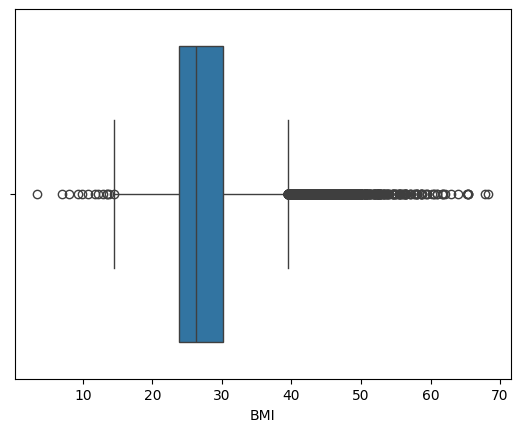

In [32]:
sns.boxplot(x=df['bmi'])
plt.xlabel("BMI")
plt.savefig("boxplot_bmi.png",dpi=300,bbox_inches="tight")
plt.show()

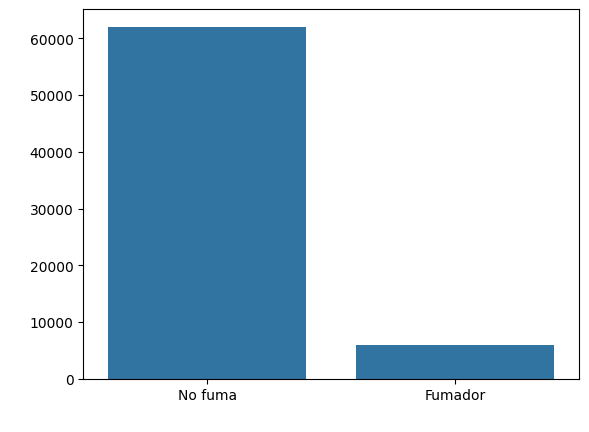

In [33]:
sns.countplot(x='smoke',data=df)
plt.xticks(ticks=[0, 1], labels=["No fuma", "Fumador"])
plt.xlabel(" ")
plt.ylabel(" ")
plt.savefig("grbr_fumar.png",dpi=300,bbox_inches="tight")

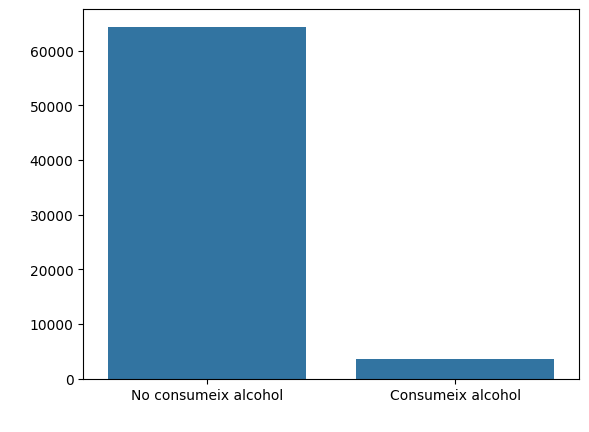

In [34]:
sns.countplot(x="alco",data=df)
plt.xticks(ticks=[0, 1], labels=["No consumeix alcohol", "Consumeix alcohol"])
plt.xlabel(" ")
plt.ylabel(" ")
plt.savefig("grbr_alcohol.png",dpi=300,bbox_inches="tight")

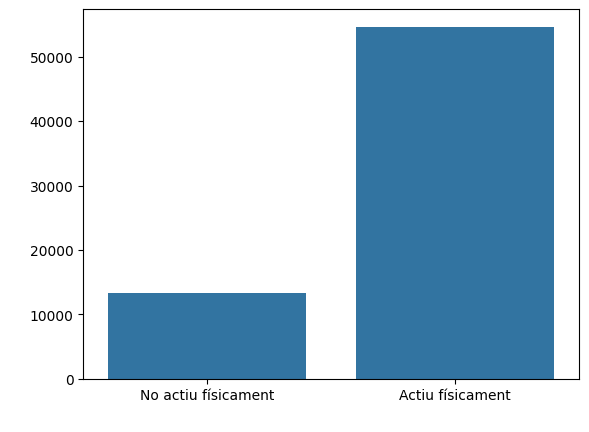

In [35]:
sns.countplot(x='active',data=df)
plt.xticks(ticks=[0, 1], labels=["No actiu físicament", "Actiu físicament"])
plt.xlabel(" ")
plt.ylabel(" ")
plt.savefig("grbr_activitat.png",dpi=300,bbox_inches="tight")

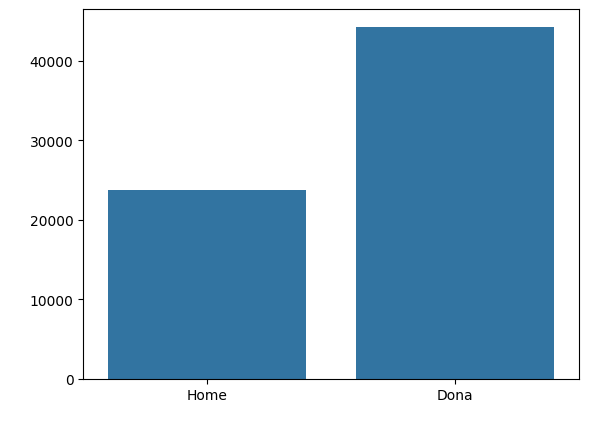

In [36]:
sns.countplot(x='Female',data=df)
plt.xticks(ticks=[0, 1], labels=["Home", "Dona"])
plt.xlabel(" ")
plt.ylabel(" ")
plt.savefig("grbr_sexe.png",dpi=300,bbox_inches="tight")

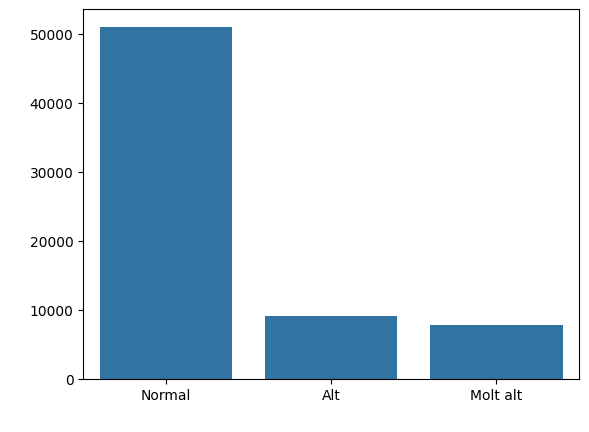

In [37]:
sns.countplot(x='cholesterol',data=df)
plt.xticks(ticks=[0,1,2], labels=["Normal", "Alt", "Molt alt"])
plt.xlabel(" ")
plt.ylabel(" ")
plt.savefig("grbr_colesterol.png",dpi=300,bbox_inches="tight")

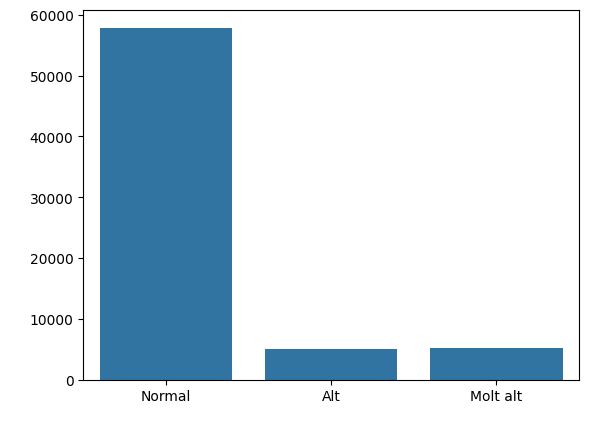

In [38]:
sns.countplot(x='gluc',data=df)
plt.xticks(ticks=[0, 1,2], labels=["Normal", "Alt", "Molt alt"])
plt.xlabel(" ")
plt.ylabel(" ")
plt.savefig("grbr_glucosa.png",dpi=300,bbox_inches="tight")

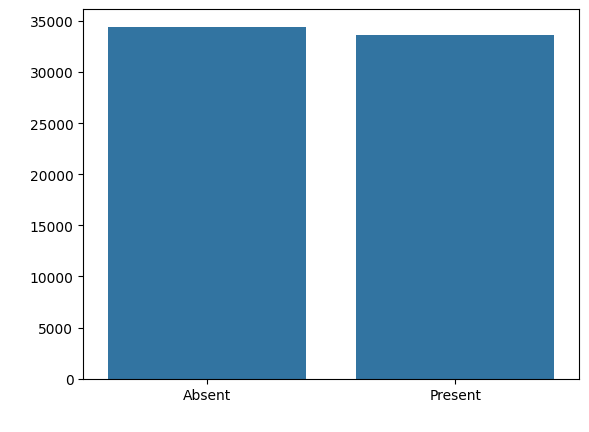

In [39]:
sns.countplot(x='cardio',data=df)
plt.xticks(ticks=[0, 1], labels=["Absent", "Present"])
plt.xlabel(" ")
plt.ylabel(" ")
plt.savefig("grbr_cardio.png",dpi=300,bbox_inches="tight")

#### Correlació entre les variables

In [40]:
df_numeric=df[['age','bmi','ap_hi','ap_lo']]
df_numeric

,age,bmi,ap_hi,ap_lo
0,50,21.967120,110,80
1,55,34.927679,140,90
2,51,23.507805,130,70
3,48,28.710479,150,100
4,47,23.011177,100,60
...,...,...,...,...
68200,52,26.927438,120,80
68201,61,50.472681,140,90
68202,52,31.353579,180,90
68203,61,27.099251,135,80


In [41]:
correlation_matrix = df_numeric.corr()
correlation_matrix

,age,bmi,ap_hi,ap_lo
age,1.000000,0.102575,0.210995,0.155647
bmi,0.102575,1.000000,0.267552,0.239575
ap_hi,0.210995,0.267552,1.000000,0.731778
ap_lo,0.155647,0.239575,0.731778,1.000000


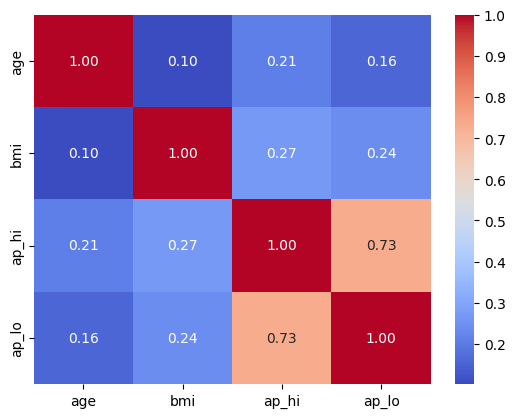

In [42]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f',cbar=True)
plt.savefig("mapa_calor_corr.png",dpi=300,bbox_inches="tight")
plt.show()

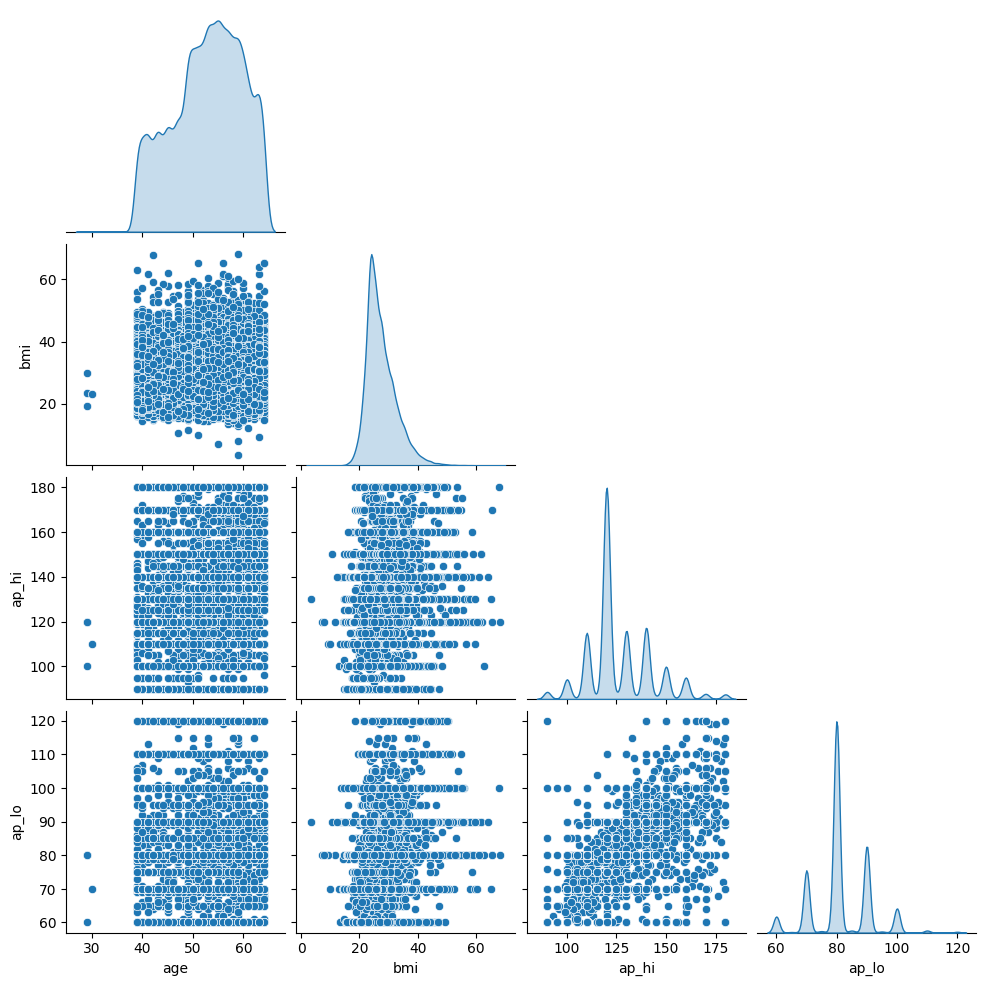

In [43]:
sns.pairplot(df_numeric,corner=True, diag_kind='kde')
plt.savefig("diagrames_disperssio.png",dpi=300,bbox_inches="tight")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

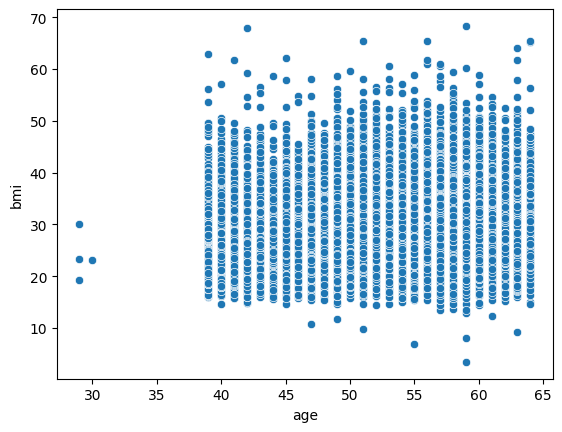

In [44]:
sns.scatterplot(data=df_numeric, x='age', y='bmi')
plt.savefig("diagrames_disperssio_age-bmi.png",dpi=300,bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

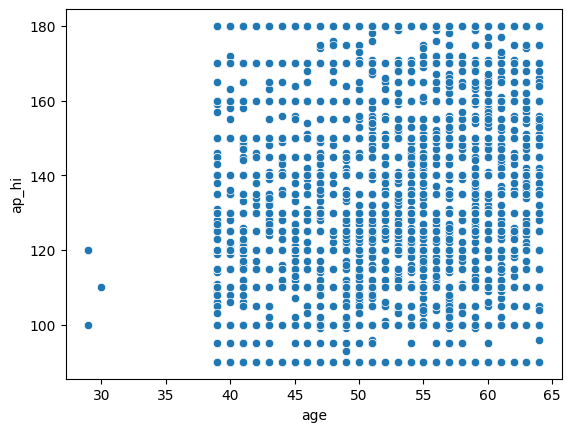

In [45]:
sns.scatterplot(data=df_numeric, x='age', y='ap_hi')
plt.savefig("diagrames_disperssio_age-ap_hi.png",dpi=300,bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

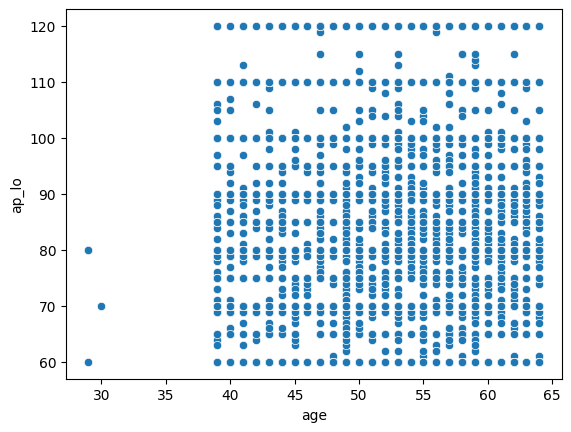

In [46]:
sns.scatterplot(data=df_numeric, x='age', y='ap_lo')
plt.savefig("diagrames_disperssio_age-aplo.png",dpi=300,bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

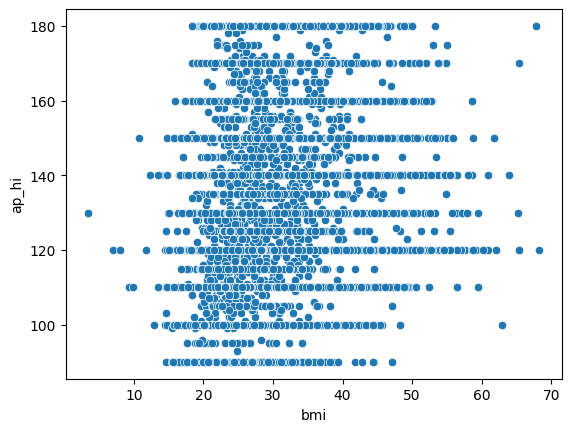

In [47]:
sns.scatterplot(data=df_numeric, x='bmi', y='ap_hi')
plt.savefig("diagrames_disperssio_bmi-aphi.png",dpi=300,bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

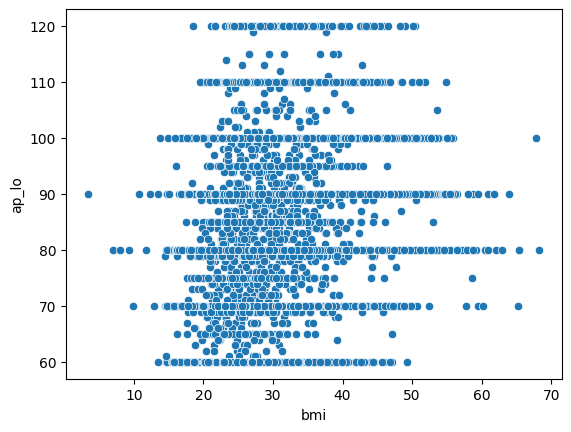

In [48]:
sns.scatterplot(data=df_numeric, x='bmi', y='ap_lo')
plt.savefig("diagrames_disperssio_bmi-aplo.png",dpi=300,bbox_inches="tight")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

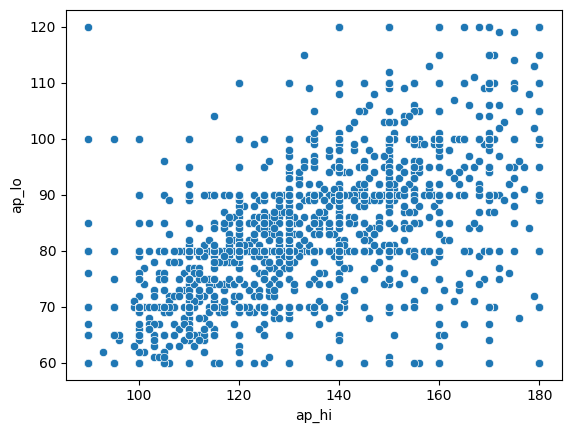

In [49]:
sns.scatterplot(data=df_numeric, x='ap_hi', y='ap_lo')
plt.savefig("diagrames_disperssio_aphi-aplo.png",dpi=300,bbox_inches="tight")
plt.show

##### Anàlisi més profund de la correlació entre les variables categòriques

In [50]:
import itertools

In [51]:
def plot_stacked_bar_charts(df, categorical_columns):
    combinations = list(itertools.combinations(categorical_columns, 2))  
    
    for var1, var2 in combinations:
        contingency_table = pd.crosstab(df[var1], df[var2])
        
        contingency_table.plot(kind='bar', stacked=True, figsize=(8,6))
        
        plt.title(f'Relació entre {var1} y {var2}')
        plt.xlabel(var1)
        plt.ylabel('Número de persones')
        plt.xticks(rotation=0)  
        
        plt.show()

In [52]:
categorical_columns = ['Female','Male', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

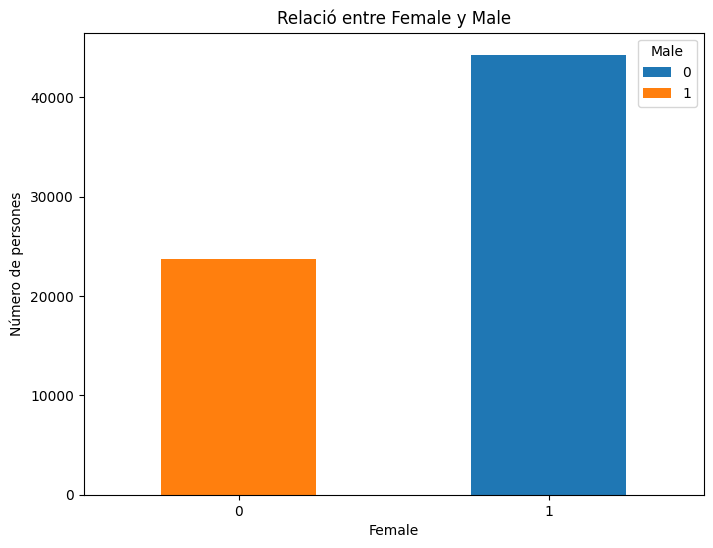

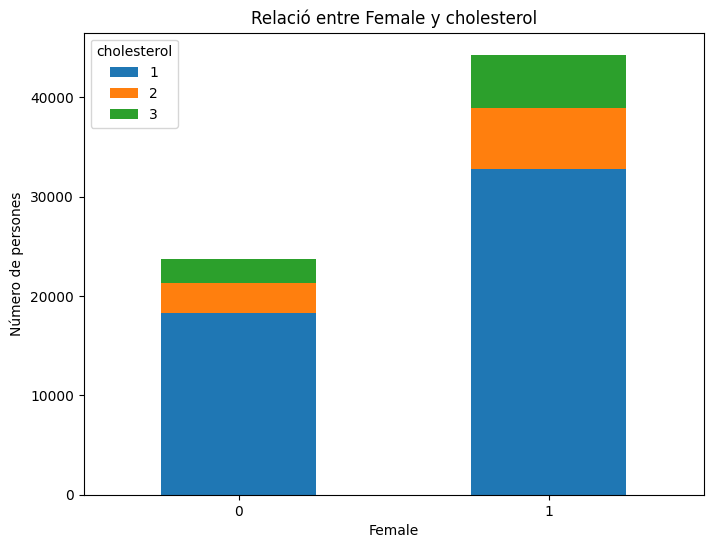

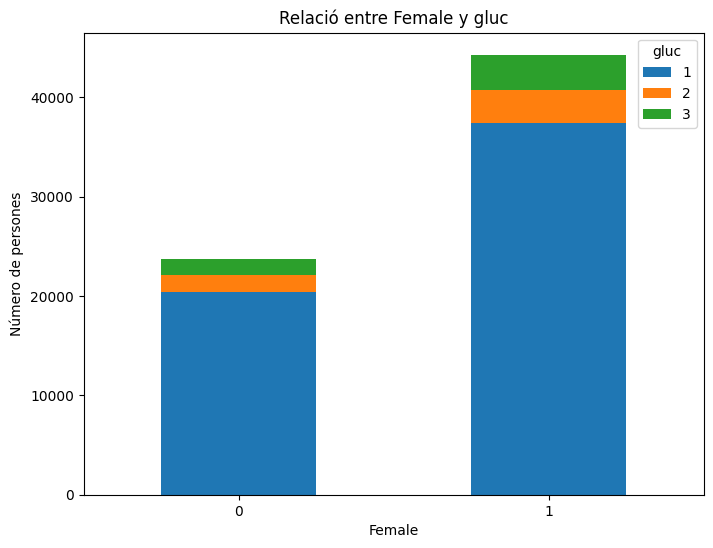

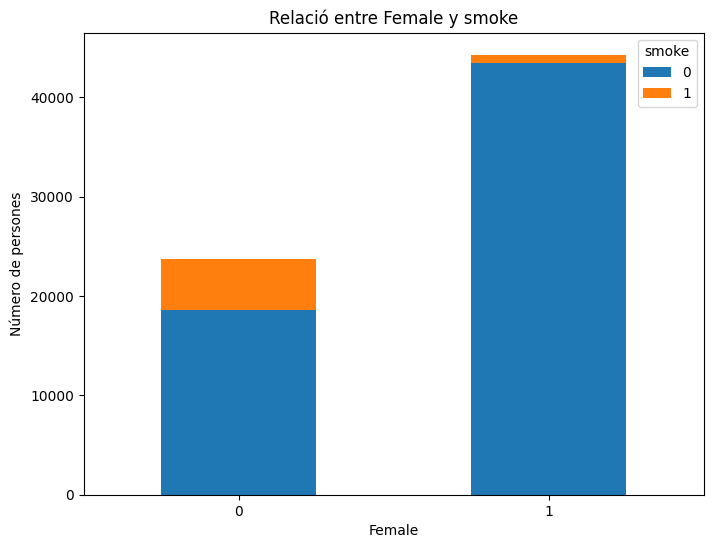

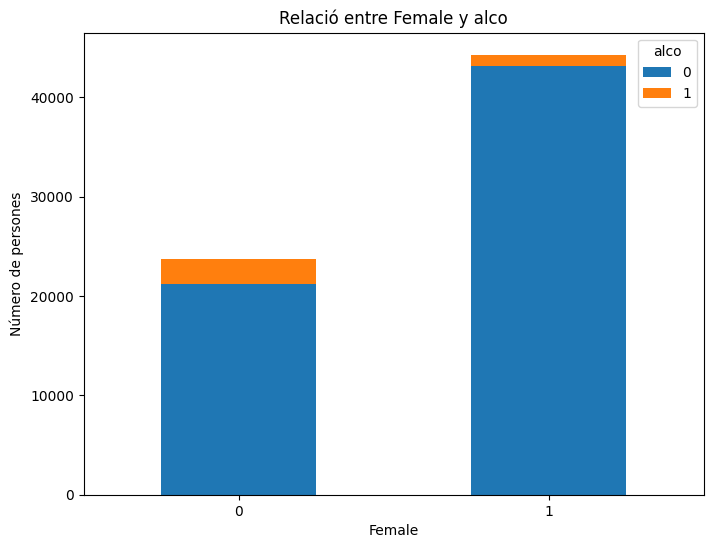

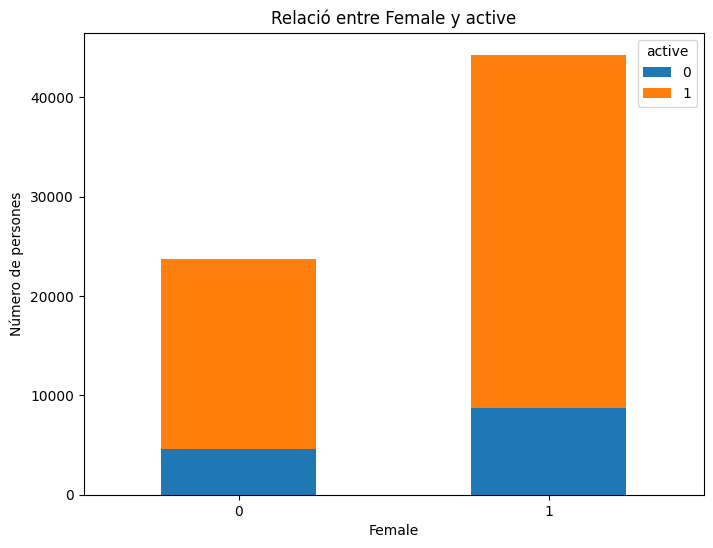

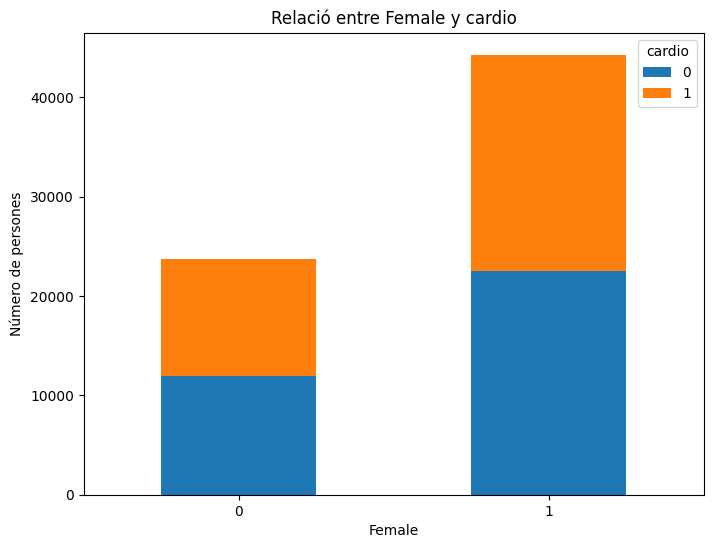

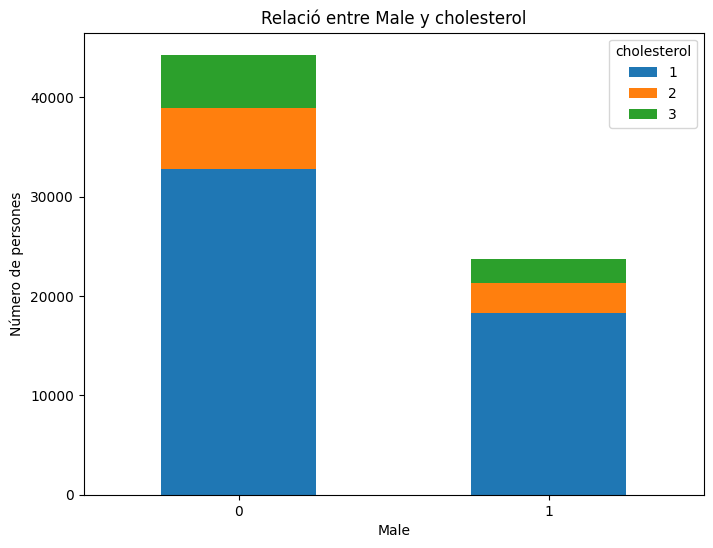

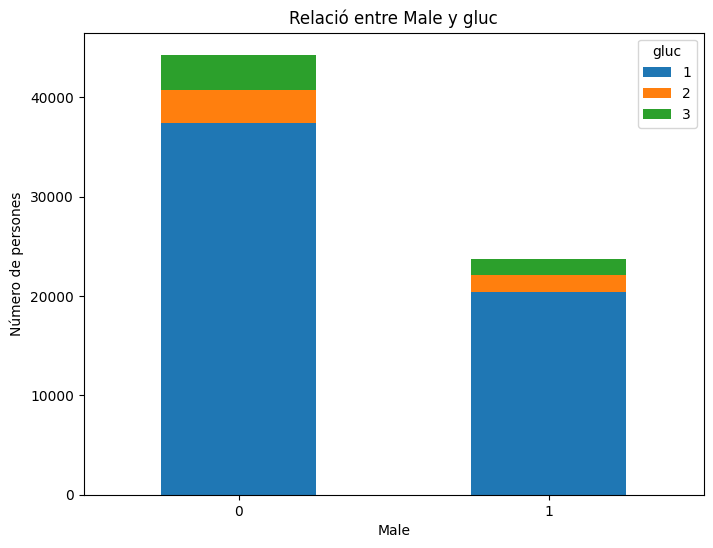

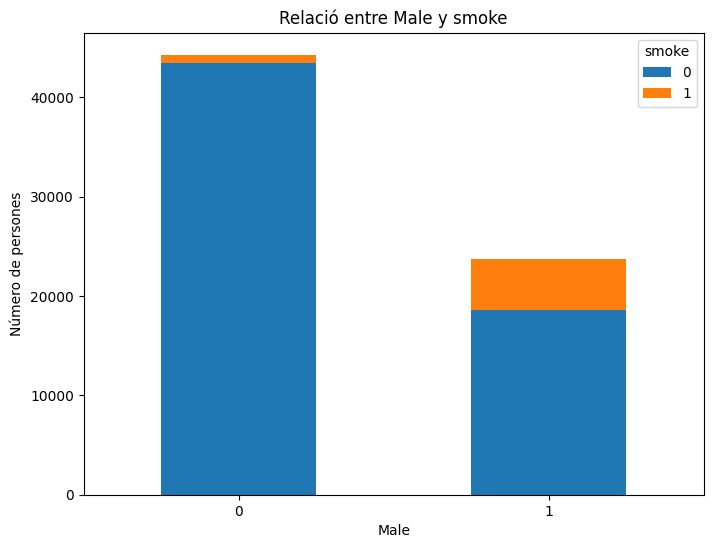

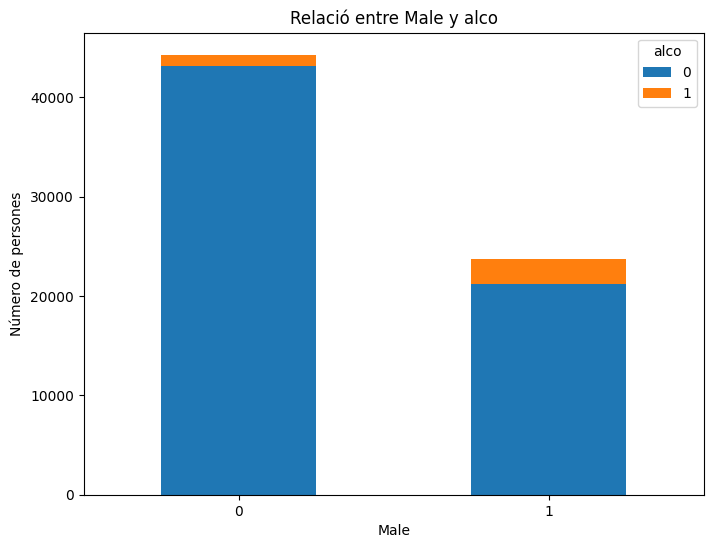

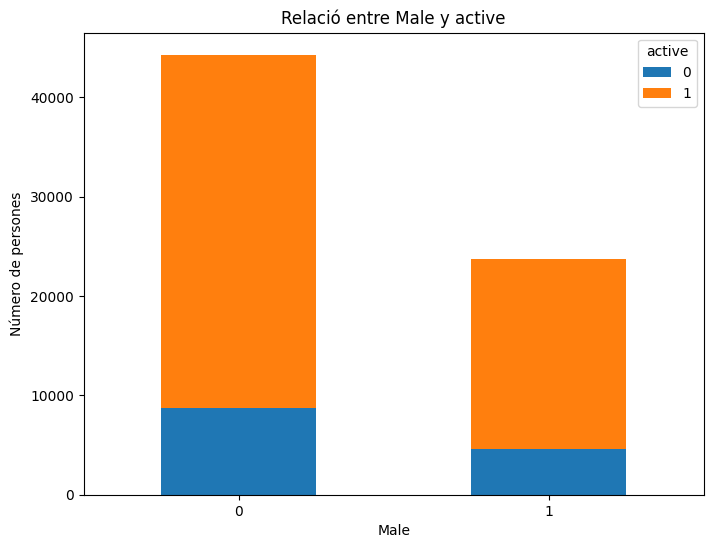

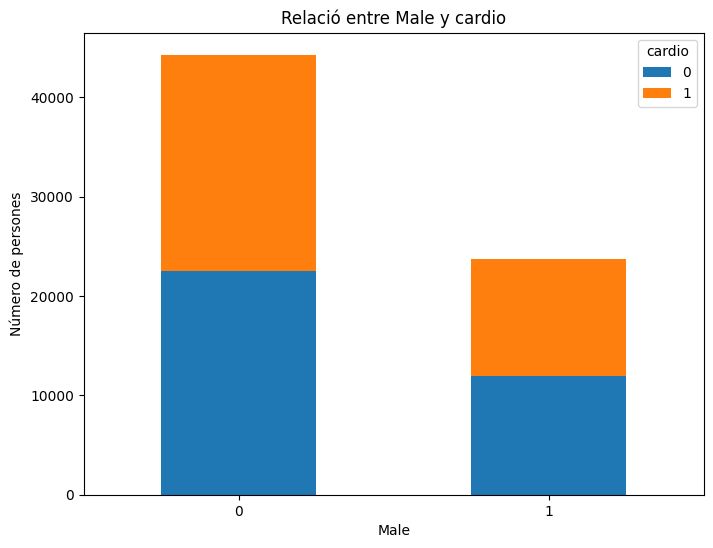

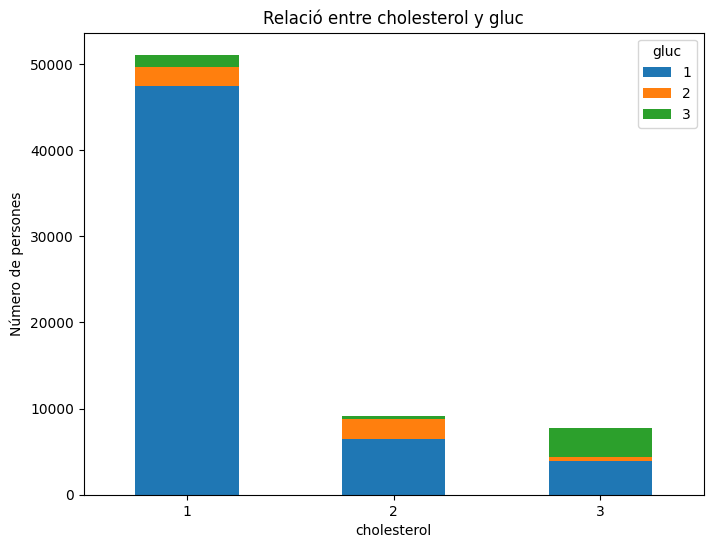

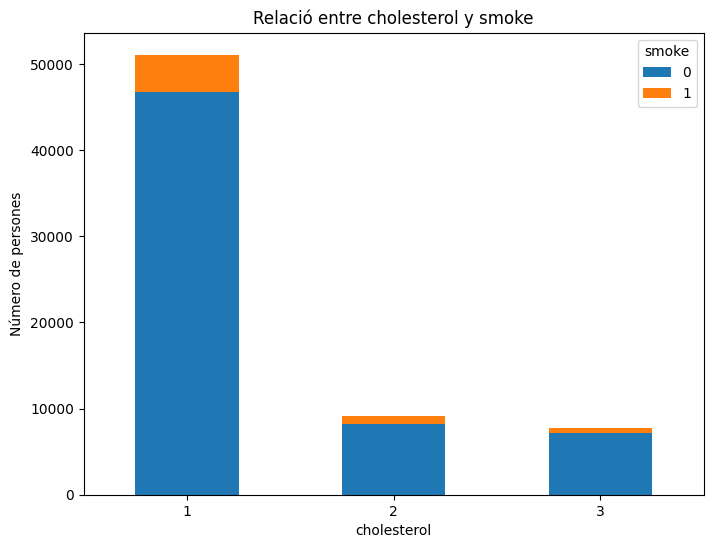

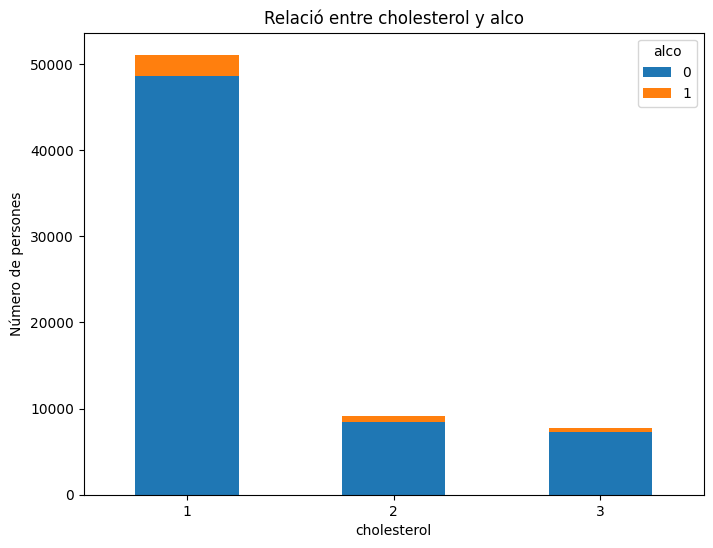

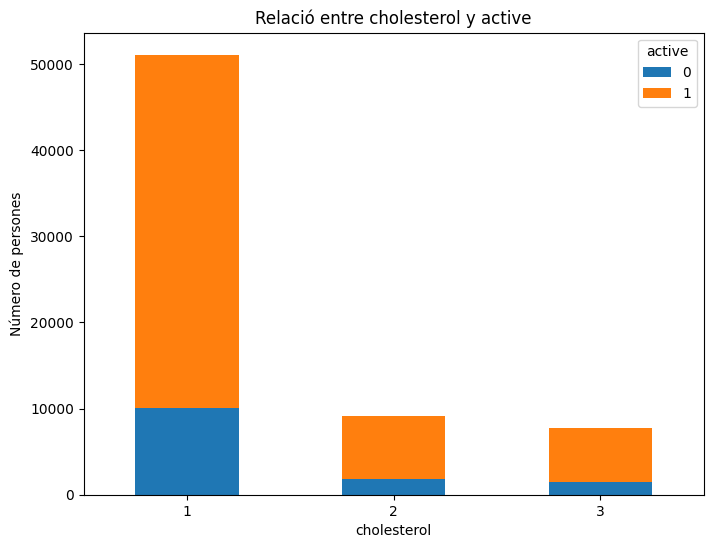

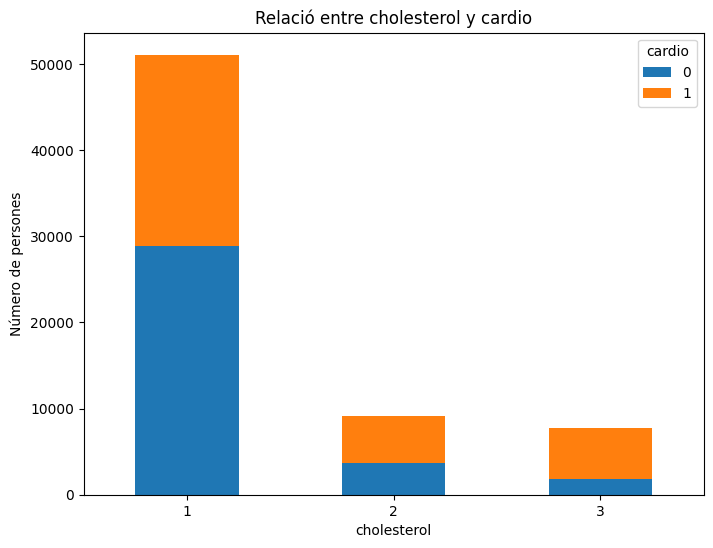

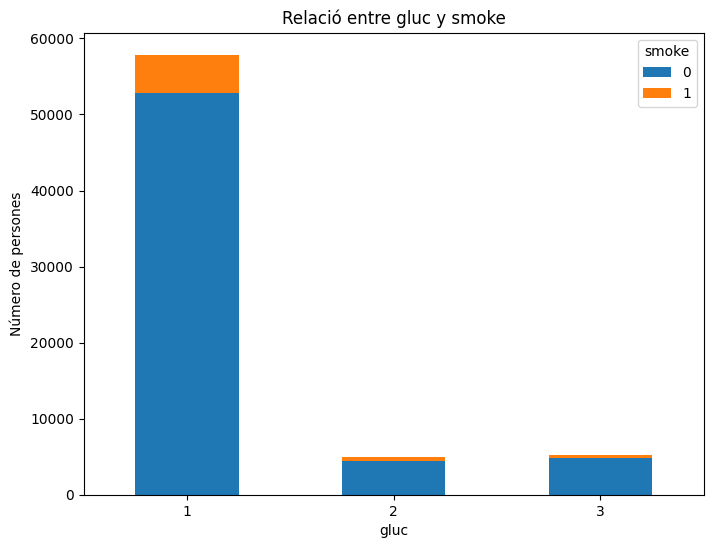

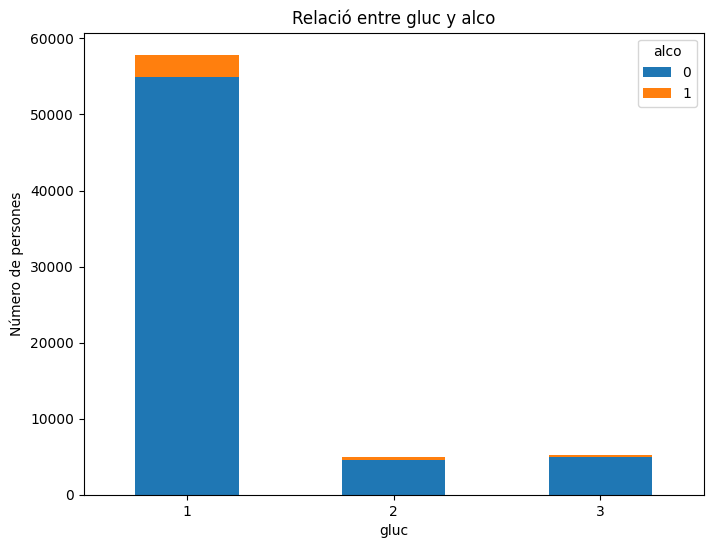

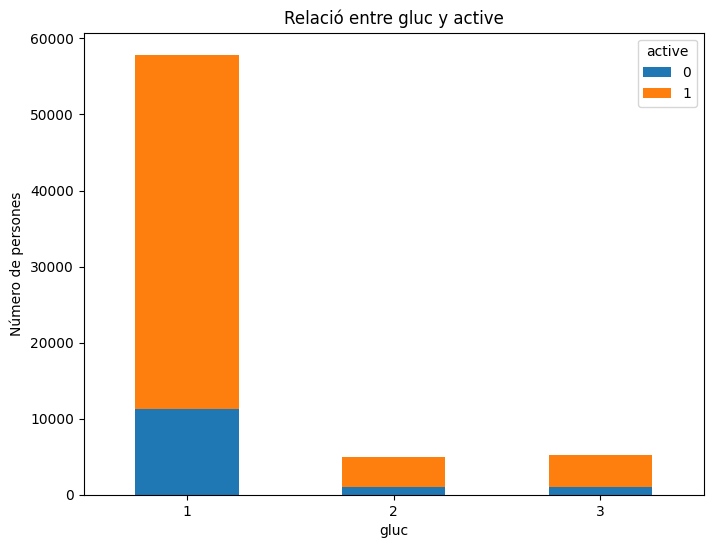

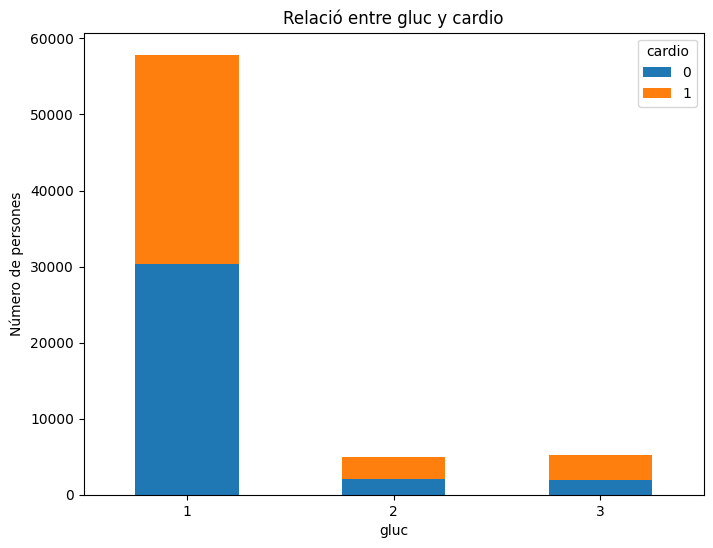

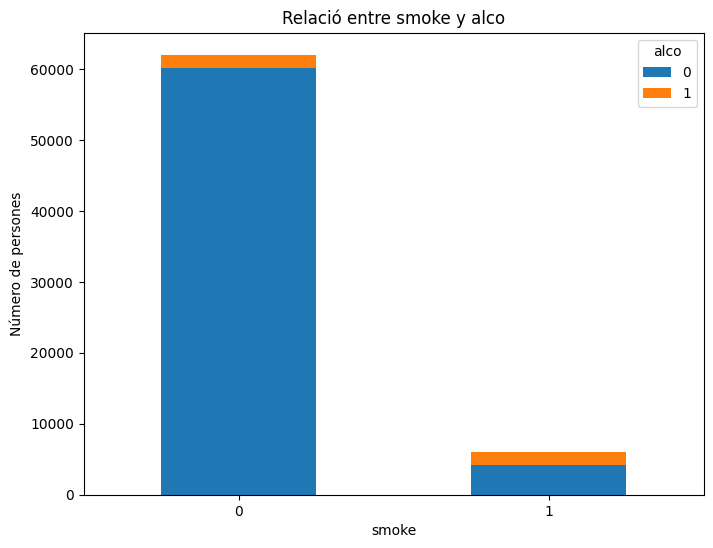

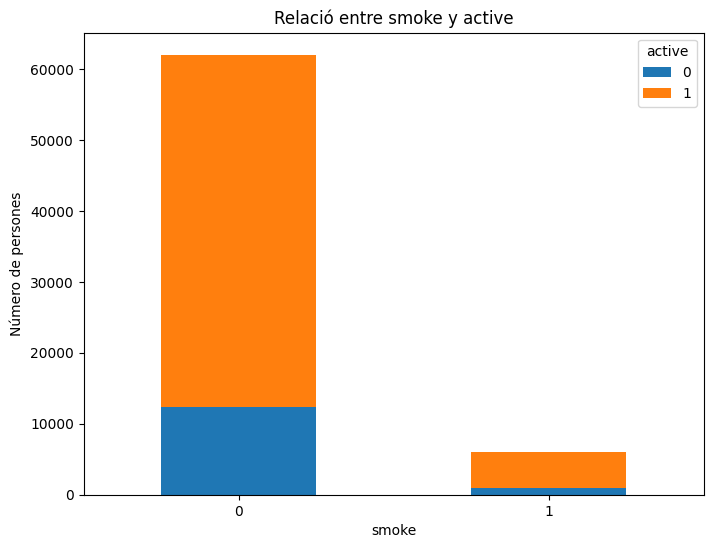

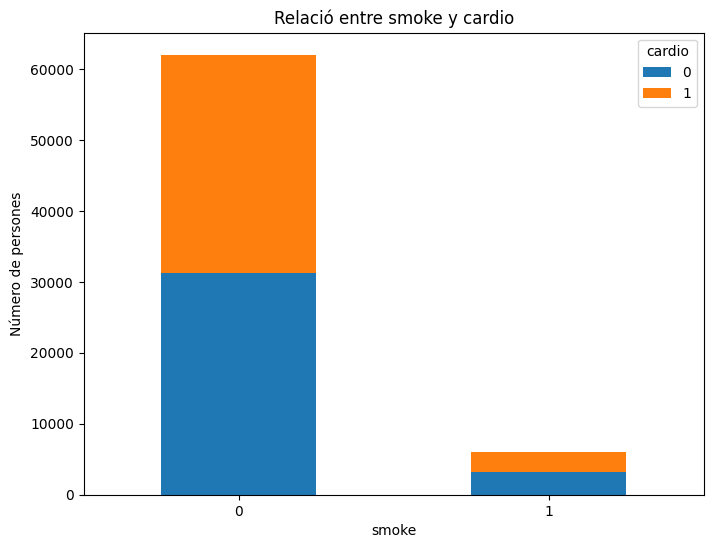

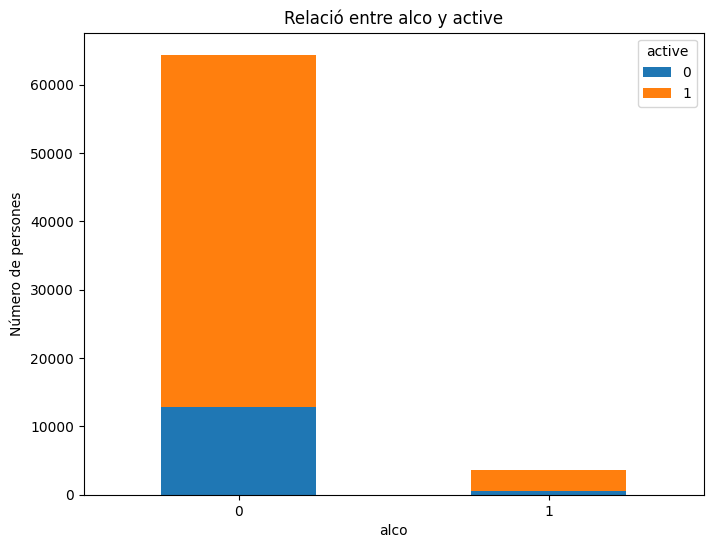

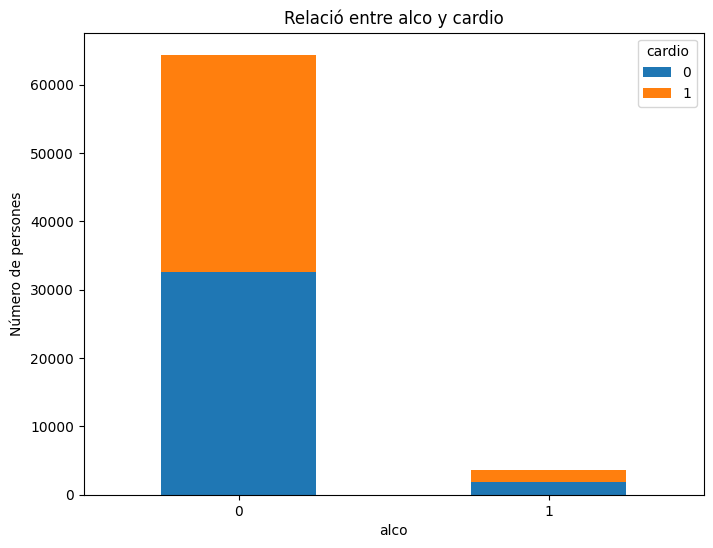

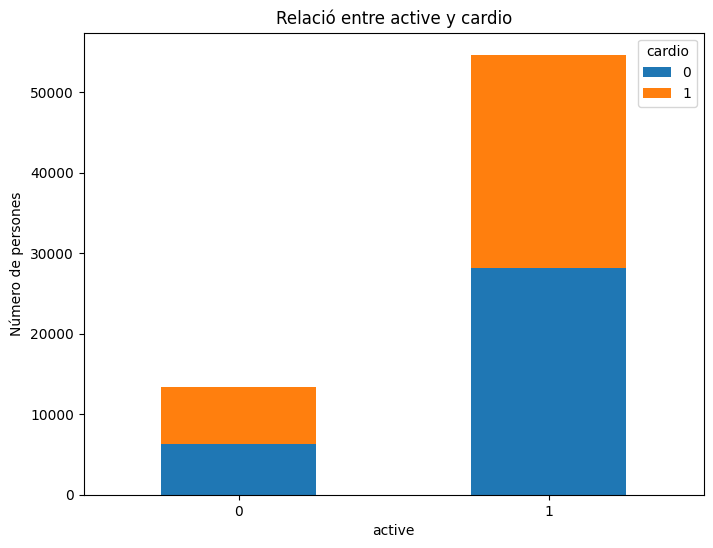

In [53]:
plot_stacked_bar_charts(df, categorical_columns)

## Preparació del dataset

In [54]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from sklearn.metrics import classification_report

In [55]:
variables_continues=['age','bmi','ap_hi','ap_lo']
for c in variables_continues:
    max_value = df[c].quantile(0.75) + 1.5*(df[c].quantile(0.75) - df[c].quantile(0.25))
    df.loc[df[c] > max_value, c] = max_value #esborrem outliers
    df["{}_scaled".format(c)] = (df[c] - df[c].mean()) / df[c].std()

In [56]:
explanatory_variables = [c for c in df.columns if c not in ['cardio','ap_hi','ap_lo','age','bmi']]
target_variable = "cardio"
explanatory_variables
X = df[explanatory_variables]
y = df[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (54408, 11)
X_test shape: (13603, 11)
y_train shape: (54408,)
y_test shape: (13603,)


## Entrenament del model lineal


In [57]:
'''
LA SEGÜENT FUNCIÓ ESTÀ DEFINIDA PER ENTRENAR UN MODEL DE REGRESSIÓ LOGISTICA AMB PENSALITZACIÓ L2 SEGONS
EL VALOR DE L'HIPERPARÀMETRE C. A MÉS, TAMBÉ CALCULA LES MÈTRIQUES SEGONS EL THRESHOLD
'''
def Logistic_regression(C,threshold):
    model = LogisticRegression(penalty="l2", C=C, max_iter=1000).fit(X_train, y_train.values.ravel())
    y_pred_train_proba = model.predict_proba(X_train)[:,1]
    y_pred_train= (y_pred_train_proba > threshold).astype(int)
    acc_train = accuracy_score(y_train, y_pred_train)
    #acc_test= accuracy_score(y_test, y_pred_train)
    pr_train = precision_score(y_train, y_pred_train,zero_division=1)
    rec_train = recall_score(y_train, y_pred_train)
    
    return acc_train,pr_train,rec_train

#### Visualització inicial dels resultats

In [58]:
metrics = []

#Valors de C i thresholds que considerarem.
Cs = np.logspace(-2, 2, 20)
thresholds = np.arange(0.1,1,0.1)

for C in Cs:
  for threshold in thresholds:
    acc_train,pr_train,rec_train = Logistic_regression(C,threshold)
    metric = {}
    metric["C"] = C
    metric["threshold"] = threshold
    metric["acc_train"] = acc_train
    metric['pr_train']=pr_train
    metric['rec_train']=rec_train
    metrics.append(metric)

metrics = pd.DataFrame(metrics)

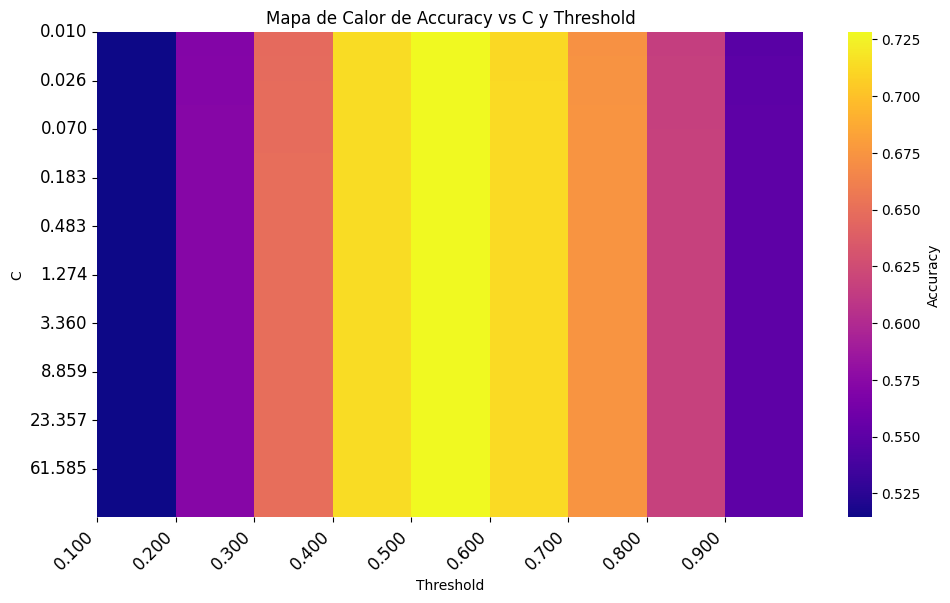

In [59]:
pr_pivot = pd.pivot_table(metrics, values="acc_train", index="C", columns="threshold")

# Creació del mapa de calor.
plt.figure(figsize=(10, 6))
sns.heatmap(pr_pivot, cmap="plasma", annot=False, cbar_kws={'label': 'Accuracy'})


plt.xticks(
    ticks=range(len(pr_pivot.columns)), 
    labels=[f"{x:.3f}" for x in pr_pivot.columns], 
    rotation=45, 
    fontsize=12,
    ha='right'
)

y_labels = [f"{y:.3f}" for y in pr_pivot.index]
y_ticks = np.arange(0, len(pr_pivot.index), max(1, len(pr_pivot.index) // 10)) 
plt.yticks(
    ticks=y_ticks, 
    labels=[y_labels[i] for i in y_ticks], 
    fontsize=12
)

plt.tight_layout()
plt.title("Mapa de Calor de Accuracy vs C y Threshold")
plt.xlabel("Threshold")
plt.ylabel("C")
plt.savefig("mapa_calor_inicial.png",dpi=300,bbox_inches="tight")
plt.show()

#### Visualització acurada dels resultats

In [60]:
metrics = []

#Valors de C i thresholds que considerarem.
Cs = np.arange(1,10,0.1)
thresholds = np.arange(0.39,0.7,0.01)

for C in Cs:
  for threshold in thresholds:
    acc_train,pr_train,rec_train = Logistic_regression(C,threshold)
    metric = {}
    metric["C"] = C
    metric["threshold"] = threshold
    metric["acc_train"] = acc_train
    metric['pr_train']=pr_train
    metric['rec_train']=rec_train
    metrics.append(metric)

metrics = pd.DataFrame(metrics)


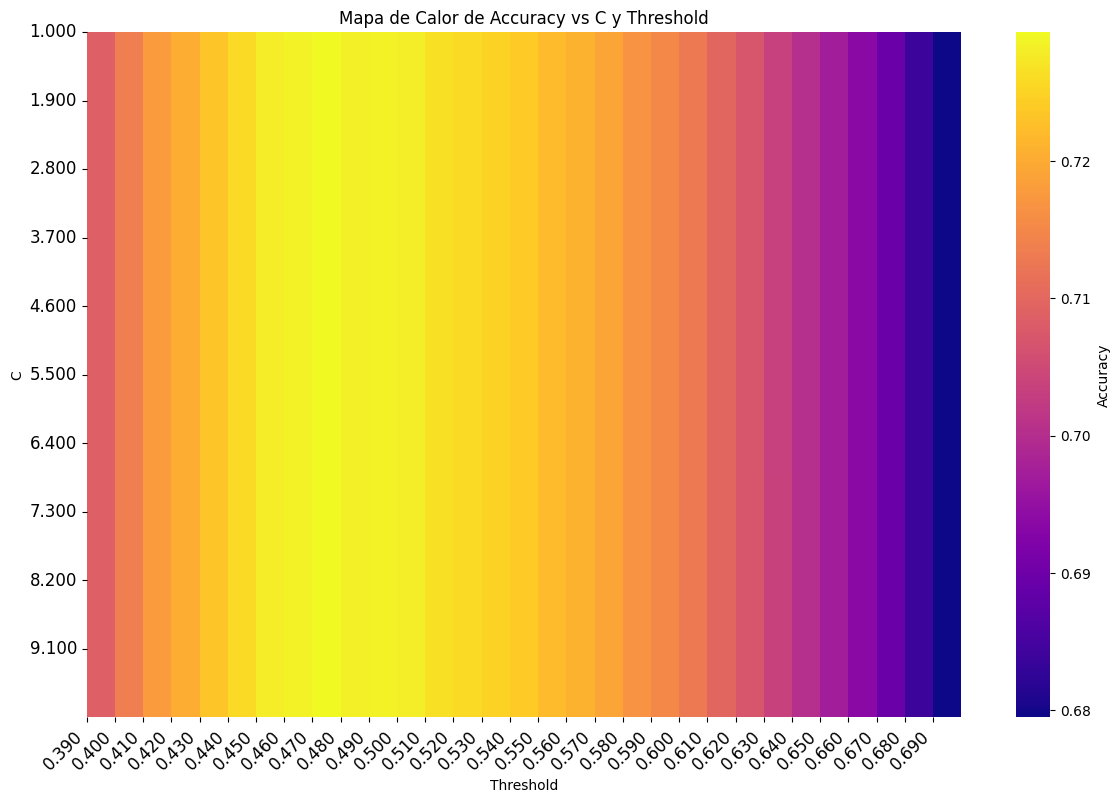

In [61]:
pr_pivot = pd.pivot_table(metrics, values="acc_train", index="C", columns="threshold")

# Creació del mapa de calor.
plt.figure(figsize=(12, 8))
sns.heatmap(pr_pivot, cmap="plasma", annot=False, cbar_kws={'label': 'Accuracy'})

plt.xticks(
    ticks=range(len(pr_pivot.columns)), 
    labels=[f"{x:.3f}" for x in pr_pivot.columns], 
    rotation=45, 
    fontsize=12,
    ha='right'
)

y_labels = [f"{y:.3f}" for y in pr_pivot.index]
y_ticks = np.arange(0, len(pr_pivot.index), max(1, len(pr_pivot.index) // 10)) 
plt.yticks(
    ticks=y_ticks, 
    labels=[y_labels[i] for i in y_ticks], 
    fontsize=12
)

plt.tight_layout()

plt.title("Mapa de Calor de Accuracy vs C y Threshold")
plt.xlabel("Threshold")
plt.ylabel("C")
plt.savefig("mapa_cal_acc.png",dpi=300,bbox_inches="tight")
plt.show()

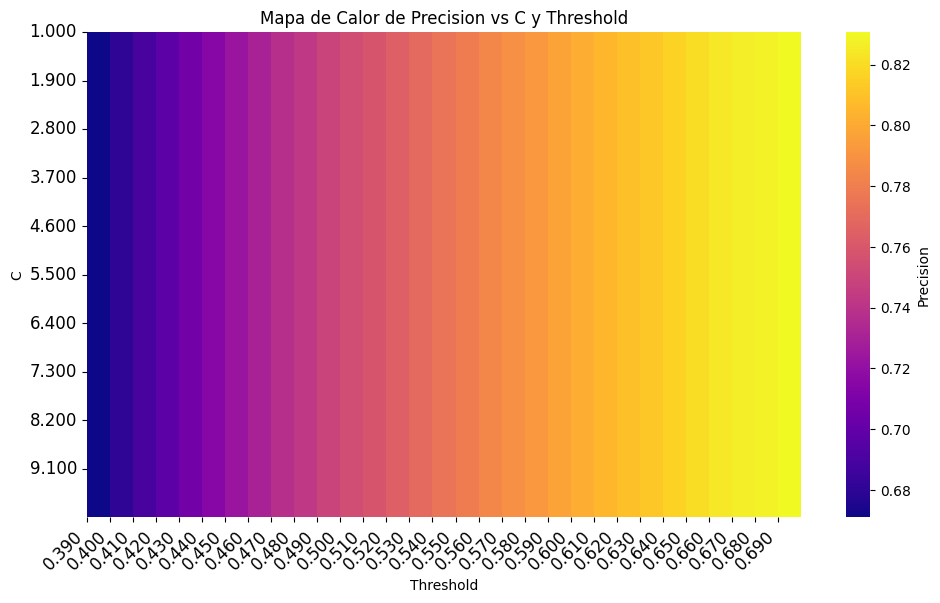

In [62]:
pr_pivot = pd.pivot_table(metrics, values="pr_train", index="C", columns="threshold")

# Creaació del mapa de calor.
plt.figure(figsize=(10, 6))
sns.heatmap(pr_pivot, cmap="plasma", annot=False, cbar_kws={'label': 'Precision'})

plt.xticks(
    ticks=range(len(pr_pivot.columns)), 
    labels=[f"{x:.3f}" for x in pr_pivot.columns], 
    rotation=45, 
    fontsize=12,
    ha='right'
)

y_labels = [f"{y:.3f}" for y in pr_pivot.index]
y_ticks = np.arange(0, len(pr_pivot.index), max(1, len(pr_pivot.index) // 10))
plt.yticks(
    ticks=y_ticks, 
    labels=[y_labels[i] for i in y_ticks], 
    fontsize=12
)

plt.tight_layout()

plt.title("Mapa de Calor de Precision vs C y Threshold")
plt.xlabel("Threshold")
plt.ylabel("C")
plt.savefig("mapa_cal_precision.png",dpi=300,bbox_inches="tight")
plt.show()

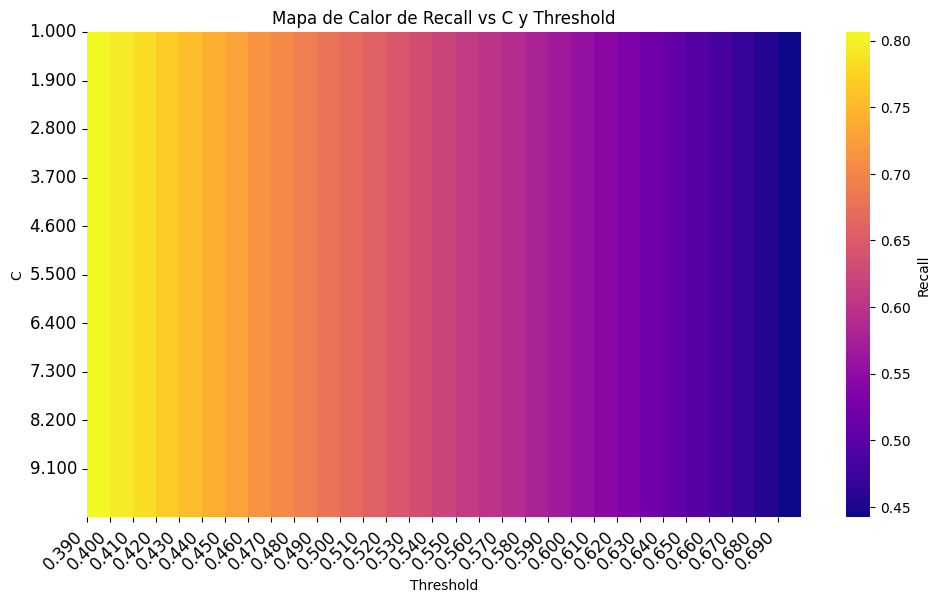

In [63]:
pr_pivot = pd.pivot_table(metrics, values="rec_train", index="C", columns="threshold")

plt.figure(figsize=(10, 6))
sns.heatmap(pr_pivot, cmap="plasma", annot=False, cbar_kws={'label': 'Recall'})


plt.xticks(
    ticks=range(len(pr_pivot.columns)), 
    labels=[f"{x:.3f}" for x in pr_pivot.columns], 
    rotation=45, 
    fontsize=12,
    ha='right'
)

y_labels = [f"{y:.3f}" for y in pr_pivot.index]
y_ticks = np.arange(0, len(pr_pivot.index), max(1, len(pr_pivot.index) // 10)) 
plt.yticks(
    ticks=y_ticks, 
    labels=[y_labels[i] for i in y_ticks], 
    fontsize=12
)

plt.tight_layout()

plt.title("Mapa de Calor de Recall vs C y Threshold")
plt.xlabel("Threshold")
plt.ylabel("C")
plt.savefig("mapa_cal_recall.png",dpi=300,bbox_inches="tight")
plt.show()

In [64]:
model = LogisticRegression(penalty="l2", C=1, max_iter=1000).fit(X_train, y_train.values.ravel())

In [65]:
y_pred_test_proba = model.predict_proba(X_test)[:,1]   
y_pred_test = (y_pred_test_proba > 0.45).astype(int)

In [66]:
report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      6937
           1       0.72      0.73      0.72      6666

    accuracy                           0.73     13603
   macro avg       0.73      0.73      0.73     13603
weighted avg       0.73      0.73      0.73     13603



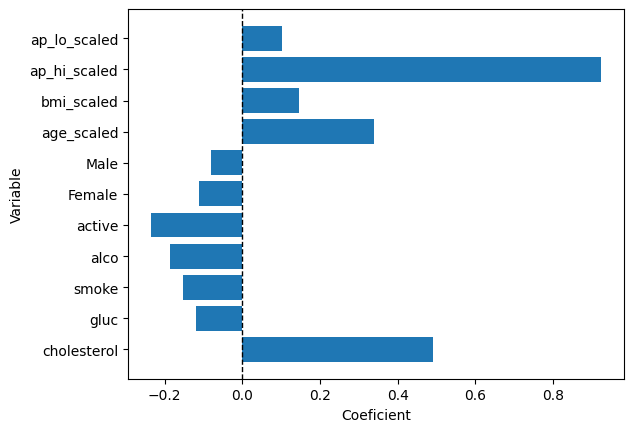

In [67]:
coef = model.coef_[0]
plt.barh(explanatory_variables, coef)
plt.axvline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel("Coeficient")
plt.ylabel("Variable")
plt.savefig("imp_var_expl.png",dpi=300,bbox_inches="tight")
plt.show()

## Entrenament Random Forests

In [68]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [69]:
def Random_forests(max_depth,n_estimators):
    
    model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=1).fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    rec_train = recall_score(y_train, y_pred_train)
    rec_test= recall_score(y_test, y_pred_test)
    return rec_train,rec_test

In [70]:
recalls = []

max_depth = np.arange(10, 15, 1)
n_estimators = [50,100,150,200,250]

for m in max_depth:
  for n in n_estimators:
    rec_train, rec_test = Random_forests(m,n)
    recall = {}
    recall["max_depth"] = m
    recall["n_estimators"] = n
    recall["rec_train"] = rec_train
    recall["rec_test"] = rec_test
    recalls.append(recall)

recalls = pd.DataFrame(recalls)

In [71]:
rec_test = pd.pivot_table(recalls, values="rec_test", index="max_depth", columns="n_estimators")

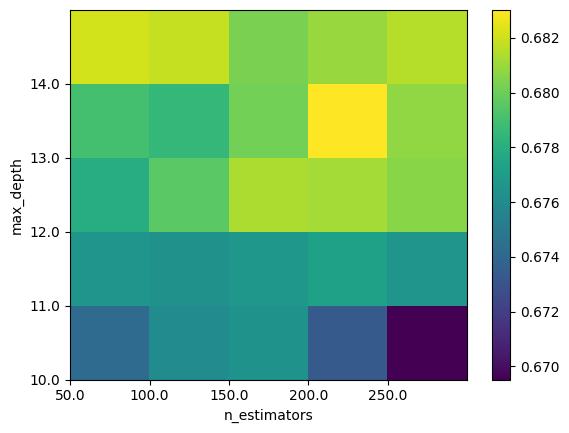

<Figure size 640x480 with 0 Axes>

In [72]:
plt.pcolor(rec_test)
plt.xticks(
    np.arange(len(rec_test.columns)), 
    labels=[f'{col:.1f}' for col in rec_test.columns], 
)
plt.yticks(
    np.arange(len(rec_test.index)), 
    labels=[f'{col:.1f}' for col in rec_test.index], 
)
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.colorbar()
plt.show()
plt.savefig('calor_forest.png')

In [73]:
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = RandomForestClassifier(n_estimators=225, max_depth=13, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6937
           1       0.75      0.68      0.72      6666

    accuracy                           0.73     13603
   macro avg       0.74      0.73      0.73     13603
weighted avg       0.74      0.73      0.73     13603



In [74]:
importances=model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

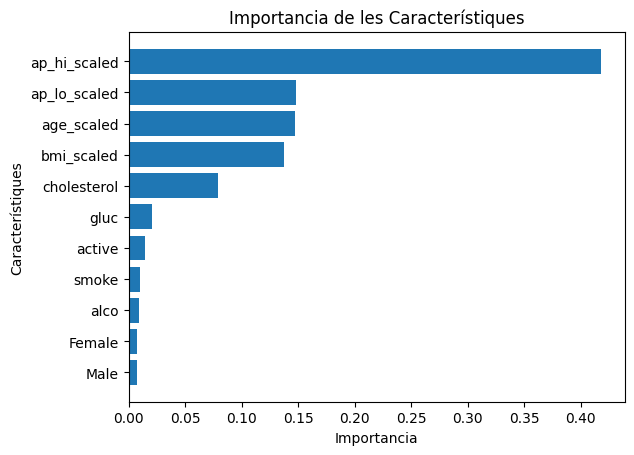

In [75]:
# Gráfico de barras
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característiques')
plt.title('Importancia de les Característiques')
plt.gca().invert_yaxis()
plt.show()

## Gradient boosting classifier

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.metrics import recall_score


In [77]:
def GradientClassifier(max_depth,n_estimators):
    model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=0.1,   max_depth=max_depth, random_state=1).fit(X_train, y_train)   
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    recc_train = recall_score(y_train, y_pred_train)
    recc_test= recall_score(y_test, y_pred_test)
    return recc_train,recc_test

In [78]:
recalls = []

max_depth = np.arange(4, 8, 1)
n_estimators = [70,100,150,200,250]

for m in max_depth:
  for n in n_estimators:
    recc_train, recc_test = GradientClassifier(m,n)
    recall = {}
    recall["max_depth"] = m
    recall["n_estimators"] = n
    recall["recc_train"] = recc_train
    recall["recc_test"] = recc_test
    recalls.append(recall)

recalls = pd.DataFrame(recalls)

In [79]:
rec_test = pd.pivot_table(recalls, values="recc_test", index="max_depth", columns="n_estimators")

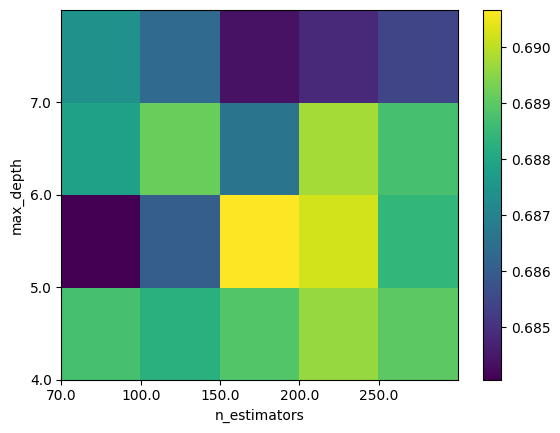

In [80]:
plt.pcolor(rec_test)
plt.xticks(
    np.arange(len(rec_test.columns)), 
    labels=[f'{col:.1f}' for col in rec_test.columns], 
)
plt.yticks(
    np.arange(len(rec_test.index)), 
    labels=[f'{col:.1f}' for col in rec_test.index], 
)
plt.xlabel("n_estimators")
plt.ylabel("max_depth")
plt.colorbar()
plt.show()

In [81]:
model = GradientBoostingClassifier(n_estimators=175, learning_rate=0.1, 
                                     max_depth=5, random_state=1).fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test= accuracy_score(y_test, y_pred_test)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6937
           1       0.75      0.69      0.72      6666

    accuracy                           0.74     13603
   macro avg       0.74      0.74      0.74     13603
weighted avg       0.74      0.74      0.74     13603



In [82]:
importances=model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

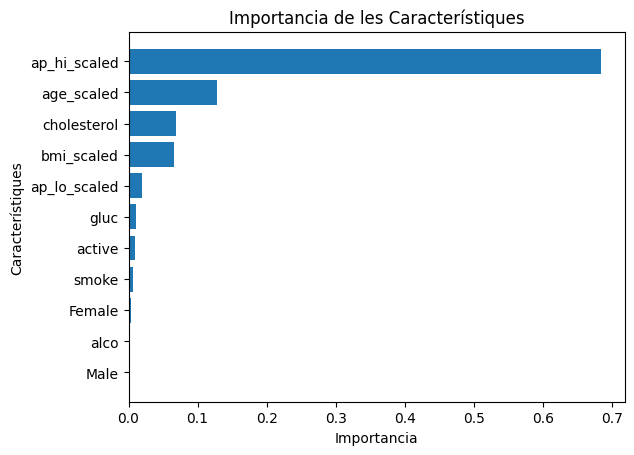

In [83]:
# Gráfico de barras
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característiques')
plt.title('Importancia de les Característiques')
plt.gca().invert_yaxis()
plt.show()